The purpose of this notebook is to perform some exploratory analysis of the 2016 User Study survey. Wahida Chowdhury and I will be working together and collaborating on ideas for this study, however this work will be largely data and visualization focused.

The User Study gathered nearly 5000 responses, anonymously asking demographic and usage information about participants' usage of the various GCTools (GCconnex, GCpedia, GCIntranet). Users' responses can be used to gather feedback on the strengths and weaknesses of the GCTools, as well as providing a description of the tools' userbases.

This file will document my research progress, starting from the very beggining of my analysis. This file will not include textual analysis, but this will be saved later for another notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#I will import more sophisticated packages (ie scklearn packages) as they are needed

In [2]:
#First we will start by importing the data. Wahida gave me two sheets, one of which contains mostly completed responses,
#The other contains mostly incomplete responses.
#Here is the first one
data_path = r"/Users/Owner/Documents/Work_transfer/User Study 2016/"
df = pd.read_excel(data_path+"User Study 2016.xlsx")

In [3]:
df.describe()

C:\Users\Owner\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,participant no,what percent of background questionnaire was not completed?,[P3Q2] 2. Do you currently work according to any of the f... [Compressed workweek],"[P3Q2] 2. Do you currently work according to any of the f... [Flexible work schedule (i.e., variable start and end times)]",[P3Q2] 2. Do you currently work according to any of the f... [Telework],[P3Q2] 2. Do you currently work according to any of the f... [Job sharing],[P3Q2] 2. Do you currently work according to any of the f... [Income averaging],[P3Q2] 2. Do you currently work according to any of the f... [I do not work according to one of these flexible working arrangements.],"[P3Q5] 5. In total, how many years have you been working ... [other]",[GCc_Q3] Why are you not using GCconnex (select all that ap... [I don’t know why I would use it],...,[GCi_Q3] Why are you not using GCintranet (select all that ... [My supervisor does not approve],[GCi_Q3] Why are you not using GCintranet (select all that ... [I don’t have time to learn something new],[GCi_Q3] Why are you not using GCintranet (select all that ... [The people I collaborate with do not use it],[GCi_Q3] Why are you not using GCintranet (select all that ... [It doesn’t have the tools or information that I need],[GCi_Q3] Why are you not using GCintranet (select all that ... [I don't see its value or purpose; other tools let me collaborate],"[GCi_Q3] Why are you not using GCintranet (select all that ... [Other, please specify:]",[GCi_Q5] Why do you use GCintranet (select all that apply)? [To find and re-use information provided],"[GCi_Q5] Why do you use GCintranet (select all that apply)? [To find official, and authoritative content]","[GCi_Q5] Why do you use GCintranet (select all that apply)? [Career development: mentoring, training, learning]","[GCi_Q5] Why do you use GCintranet (select all that apply)? [Other, please specify:]"
count,4860.000000,4860.000000,973.0,746.0,653.0,4.0,147.0,2730.0,4615.000000,551.0,...,4.0,58.0,129.0,49.0,90.0,98.0,635.0,733.0,332.0,98.0
mean,2430.500000,0.362708,1.0,1.0,1.0,1.0,1.0,1.0,14.935428,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,1403.105484,0.047715,0.0,0.0,0.0,0.0,0.0,0.0,8.691215,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.190476,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1215.750000,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2430.500000,0.380952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3645.250000,0.380952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4860.000000,0.761905,1.0,1.0,1.0,1.0,1.0,1.0,46.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


This file is way too big. We're gonna have to crunch this down a bit for sure.
This survey is most useful when we can link the answers to the demographics. 
I'm going to start by taking a few key questions from the data and putting that into one dataframe

In [4]:
df3 = df.filter(regex = "P3Q")

In [5]:
df3['Participant'] = df['participant no']

In [6]:
df3columns = ['Department', 'DepartmentOther', 'CompressedWeek', 'FlexibleWork', 'Telework', 'JobSharing',
              'IncomeAveraging','NoArrangement', 'Status', 'StatusOther', 'Community', 'Tenure', 'TenureOther',
              'SMLevel', 'Language', 'Region', 'Age', 'Gender', 'Education', 'Participant']
df3.columns = df3columns

df3 = df3[['Participant', 'Department', 'DepartmentOther', 'CompressedWeek', 'FlexibleWork', 'Telework', 'JobSharing',
              'IncomeAveraging','NoArrangement', 'Status', 'StatusOther', 'Community', 'Tenure', 'TenureOther',
              'SMLevel', 'Language', 'Region', 'Age', 'Gender', 'Education']]

In [7]:
df3.describe(include  = "all")

C:\Users\Owner\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Participant,Department,DepartmentOther,CompressedWeek,FlexibleWork,Telework,JobSharing,IncomeAveraging,NoArrangement,Status,StatusOther,Community,Tenure,TenureOther,SMLevel,Language,Region,Age,Gender,Education
count,4860.000000,4787,126,973.0,746.0,653.0,4.0,147.0,2730.0,4838,59,4811,4824,4615.000000,4847,4856,4810,4727,4726,4781
unique,NaN,82,90,NaN,NaN,NaN,NaN,NaN,NaN,8,49,22,2,NaN,3,3,15,9,3,5
top,NaN,Canada Revenue Agency,Service Canada,NaN,NaN,NaN,NaN,NaN,NaN,Indeterminate (permanent),military,Administration and operations,"If one or more years, please indicate the numb...",NaN,Intermediate,English,National Capital Region,50 to 54 years,Female,Bachelor's degree
freq,NaN,763,10,NaN,NaN,NaN,NaN,NaN,NaN,4319,5,783,4666,NaN,2407,3274,2429,867,2887,1776
mean,2430.500000,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,14.935428,NaN,NaN,NaN,NaN,NaN,NaN
std,1403.105484,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,8.691215,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1215.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2430.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3645.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we have all the demographic information of the participants neatly organized in one table, that can still be easily combined with other tables. For now I just want demographic info. We will dig a little bit deeper soon.

In [8]:
departments = df3['Department'].value_counts().reset_index()
departmentsother = df3['DepartmentOther'].value_counts().reset_index()# We cna ignore departments other
departments # Group similar dept's

,index,Department
0,Canada Revenue Agency,763
1,Public Services and Procurement Canada,531
2,Department of National Defence,396
3,Health Canada,233
4,Shared Services Canada,171
5,Global Affairs Canada,170
6,Employment and Social Development Canada,152
7,Environment and Climate Change Canada,149
8,Correctional Service Canada,148
9,"Immigration, Refugees and Citizenship Canada",141


In [9]:
#This actually tells us nothing that we couldn't already find

gender = df3['Gender'].value_counts().reset_index()
age = df3['Age'].value_counts().reset_index()
smlevel = df3['SMLevel'].value_counts().reset_index()
education = df3['Education'].value_counts().reset_index()
community = df3['Community'].value_counts().reset_index()

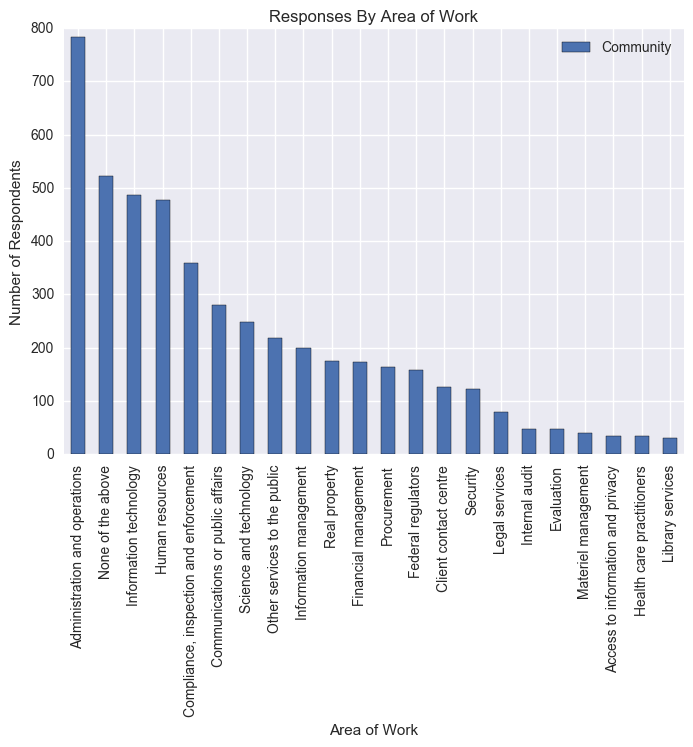

In [10]:
community
community_plot = community.set_index('index')


ax = community_plot.plot.bar(title = "Responses By Area of Work")
ax.set_xlabel("Area of Work")
ax.set_ylabel("Number of Respondents")
plt.show()

In [11]:
community_plot

,Community
index,
Administration and operations,783
None of the above,523
Information technology,486
Human resources,477
"Compliance, inspection and enforcement",359
Communications or public affairs,280
Science and technology,248
Other services to the public,218
Information management,200


This is an important table (probably one of the most directly important tables here). I don't know the statistics for public servants per category, but an interesting (although probably impossible) task would be to look at the proportion.

We'll use this later when we start looking at behaviour connected to employment group.

# GCconnex

In [12]:
dfconnex = df.filter(regex = "GCc")
dfconnex['Participant'] = df['participant no'] # This will be used to the tables

#I'm gonna take this moment to complain about the amount of columns I have to rename :'( 

In [13]:
print ("I'm so afraid of having to deal with", len(dfconnex.columns)+1,"columns :'(")

I'm so afraid of having to deal with 67 columns :'(


In [14]:
dfconnexcol = ['Aware', 'UsageLength', 'UsageLengthOther', 'NoUseWhy', 'NoUseCollab', 'NoUsePublic', 'NoUseSupervisor', 'NoUseNoTime',
               'PplNoUse', 'NoToolsInfo', 'NoPurpose', 'Other', 'OtherResponse', 'HowOftenUse', 'WhyUseConnect',
               'WhyUsePlan', 'WhyUseCoCreate', 'WhyUseFeedback', 'WhyUseOrgShareInfo', 'WhyUseFindReUseInfo',
               'WhyUseOfficialContent', 'WhyUseFindNewPos', 'WhyUseCareerDev',
               'WhyUseChat', 'WhyUseOther', 'WhyUseReason', 'EasyUse', 'EasyInfo', 'InfoUseful', 'LoadQuickly',
               'TailoredContent', 'AdequateFeedback', 'BuildRelationships', 'EasyProfile', 'EasyNewsFeed',
               'EasyOnBoarding', 'EasyNotifications', 'EasyInformationGroup', 'EasyCollabGroup', 'EasyWriteBlog',
               'EasyReadBlog', 'EasyWriteWire', 'EasyReadWire', 'EasyPostImage', 'EasyViewImage', 'EasyCreateBM',
               'EasyCreatePolls', 'EasyWidgets', 'EasyNoteIdeas', 'EasyUseChat', 'EasyUseChatrooms', 'EasyUseSearch',
               'EasyOther', 'WhyNotEasy', 'FeaturesWant', 'Helpopen', 'HelpAgile', 'HelpCollab', 'IsSecure',
               'IsReliable', 'IsCompFunctional', 'IsAlignedGovGoals', 'IsGoodSourceInfo', 'IsGoodCentralHub', 'OtherBenefits',
               'Participant']

In [15]:
dfconnex.columns = dfconnexcol # There's a piece of missing data in each entry.

In [16]:
dfconnex = dfconnex[['Participant', 'Aware', 'UsageLength', 'UsageLengthOther', 'NoUseWhy', 'NoUseCollab', 'NoUsePublic', 'NoUseSupervisor', 'NoUseNoTime',
               'PplNoUse', 'NoToolsInfo', 'NoPurpose', 'Other', 'OtherResponse', 'HowOftenUse', 'WhyUseConnect',
               'WhyUsePlan', 'WhyUseCoCreate', 'WhyUseFeedback', 'WhyUseOrgShareInfo', 'WhyUseFindReUseInfo',
               'WhyUseOfficialContent', 'WhyUseFindNewPos', 'WhyUseCareerDev',
               'WhyUseChat', 'WhyUseOther', 'WhyUseReason', 'EasyUse', 'EasyInfo', 'InfoUseful', 'LoadQuickly',
               'TailoredContent', 'AdequateFeedback', 'BuildRelationships', 'EasyProfile', 'EasyNewsFeed',
               'EasyOnBoarding', 'EasyNotifications', 'EasyInformationGroup', 'EasyCollabGroup', 'EasyWriteBlog',
               'EasyReadBlog', 'EasyWriteWire', 'EasyReadWire', 'EasyPostImage', 'EasyViewImage', 'EasyCreateBM',
               'EasyCreatePolls', 'EasyWidgets', 'EasyNoteIdeas', 'EasyUseChat', 'EasyUseChatrooms', 'EasyUseSearch',
               'EasyOther', 'WhyNotEasy', 'FeaturesWant', 'Helpopen', 'HelpAgile', 'HelpCollab', 'IsSecure',
               'IsReliable', 'IsCompFunctional', 'IsAlignedGovGoals', 'IsGoodSourceInfo', 'IsGoodCentralHub', 'OtherBenefits'
               ]]

In [17]:
dfconnex['Aware'].value_counts()

print (4057/(4057+802), "% of participants are aware of GCconnex.")
print ("I wouldn't be surprised if this was because most of the individuals saw the survey via the tools.")
print ("There is some very likely bias in this answer")

0.8349454620292242 % of participants are aware of GCconnex.
I wouldn't be surprised if this was because most of the individuals saw the survey via the tools.
There is some very likely bias in this answer


In [18]:
nousegcconnex = dfconnex[dfconnex['UsageLength'] == "Do not use at all"]

In [19]:
nousegcconnex.describe(include = "all")

C:\Users\Owner\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Participant,Aware,UsageLength,UsageLengthOther,NoUseWhy,NoUseCollab,NoUsePublic,NoUseSupervisor,NoUseNoTime,PplNoUse,...,Helpopen,HelpAgile,HelpCollab,IsSecure,IsReliable,IsCompFunctional,IsAlignedGovGoals,IsGoodSourceInfo,IsGoodCentralHub,OtherBenefits
count,1083.000000,1083,1083,0.0,551.0,179.0,118.0,7.0,190.0,511.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
top,NaN,Yes,Do not use at all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1083,1083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2251.361034,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1397.006610,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,9.000000,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1085.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2117.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3405.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above table, several key insights come up. Many employees feel they don't know why GCconnex would be a useful tool for them. Also, many employees answer that the people they collaborate do not use it (no "social" in the network). Many felt that there was no purpose to using GCconnex.

#### Compare using this with other social media habits
It might be worthwhile to compare how employees who do not use GCconnex (but are aware of it) use other media. They may have a bias toward not liking social media or newer technologies, or maybe they don't like GCconnex for work purposes. Comparing GCconnex to other social media outlets (especially as a work tool) may help determine whether it is the individual or the tool that doesn't work

In [20]:
nousegcconnex.to_csv(data_path+"nouse.csv") # Just to get a more thorough look at what's going on in the CSV

One useful tool to send to the dev team would be the user evaluations of the indivdiual aspects of GCconnex. It would be useful and simple to generate a report-card-like tool to the team, that allows them to see 

In [21]:
#Let's do the dev thing
dfdev = dfconnex.filter(regex = "Easy") #Extracts all the quesions that have the "Easy" thing. 
#I have a feeling this might be important to the dev team

In [22]:
dfdev.columns

Index(['EasyUse', 'EasyInfo', 'EasyProfile', 'EasyNewsFeed', 'EasyOnBoarding',
       'EasyNotifications', 'EasyInformationGroup', 'EasyCollabGroup',
       'EasyWriteBlog', 'EasyReadBlog', 'EasyWriteWire', 'EasyReadWire',
       'EasyPostImage', 'EasyViewImage', 'EasyCreateBM', 'EasyCreatePolls',
       'EasyWidgets', 'EasyNoteIdeas', 'EasyUseChat', 'EasyUseChatrooms',
       'EasyUseSearch', 'EasyOther', 'WhyNotEasy'],
      dtype='object')

In [23]:
dfdev.drop('WhyNotEasy', inplace = True, axis = 1)
dfdev.drop('EasyOther', inplace = True, axis = 1)

In [24]:
valuedict = {} #Taking the value counts of each question about easiness in here
for col in dfdev:
    valuedict[col] = dfdev[col].value_counts()

In [25]:
devfb = pd.DataFrame.from_dict(valuedict, orient = "index") #Turning the dictionary we just created into a dataframe

In [26]:
devfb = devfb.set_value('EasyInfo', "Don't know / Not sure / Don't use", 328) # Merging the "Dont Know" columns into one manually
devfb = devfb.set_value('EasyUse', "Don't know / Not sure / Don't use", 257)
devfb.drop("Don't know / Not sure", axis = 1, inplace = True)

In [27]:
#Now to reorder the columns because I'm pedantic like that
devfb = devfb[['Yes', 'No', "Don't know / Not sure / Don't use"]]
devfb["Don't know / Not sure / Don't use"] = devfb["Don't know / Not sure / Don't use"].astype(int)

In [28]:
devfb['Total'] = 0

for i in devfb:
    if i == 'Total':
        break
    else:
        devfb['Total'] += devfb[i]

        
#Here is the table, the meanings are still a bit obscure to anyone except myself since I rewrote the names of all the columns
#So before giving it to somebody else I'll fix the table index. But this is neat.

In [29]:
devfb

,Yes,No,Don't know / Not sure / Don't use,Total
EasyCollabGroup,1223,693,1010,2926
EasyCreateBM,564,433,1924,2921
EasyCreatePolls,192,371,2353,2916
EasyInfo,1064,1568,328,2960
EasyInformationGroup,1213,1103,618,2934
EasyNewsFeed,1693,534,705,2932
EasyNoteIdeas,261,381,2270,2912
EasyNotifications,1897,443,589,2929
EasyOnBoarding,810,747,1367,2924
EasyPostImage,455,491,1978,2924


### ease of use by frequency, recency, (area of work)

### Developer Feedback Table

The above table can help us determine what the pain points are for GCconnex. The results that indicate 'Dont Know...' likely indicate that they don't use that functionality of the website. Whereas the "No" response indicates bad news. One unfortunate reality is the answer "No" To the EasyInfo response (long form: Easy to find the information you need) outweighs the "Yes". Perhaps there are some reasons in the comments, but that's not up to me to review.

This is mirrored in the EasyinformationGroup row (long form: Easy to find information in groups). This response had more "Yes" than "No," but not by a very large margin.

Another unfortunate reality is the "EasyUse" row (long form: "Did you find it [GCconnex] easy to use?"). Most users gave a yes or no answer, but only 48% of responses indicated Yes, and 43% indicated No. 

On a more positive note, it appears many users find it easy to READ the content already posted on GCconnex. Passive activities such as View Image, Read Blog, Read Wire, and News Feed, all report a majority of affirmative responses. 

##### Observations

If I'll be allowed to abstract from the responses, evidence of a Power Law phenomenon becomes apparent again. The Power Law dynamic as it applies to social networks implies that the majority of a user base will not create content on a network, however a small group of users will create a disproportionately large amount of content. Judging from the above responses, it appears that many users find it more simple to read content than to post content. This is obvious, since reading content is very passive and relatively effortless, however posting content is rather active. The fact that reading content is easier than posting content suggests the Power Law relationship is still very much present.

The observation above is not to dismiss the troubling responses in the table above. It already takes great effort to post content onto GCconnex, since one must generate original and thoughtful responses and/or questions onto GCconnex. It should therefore be a priority for the tools team to make putting the original content onto GCconnex as simple as possible, something that can clearly be improved judging from the above responses.

The troubling response to "was it easy to find the information you needed" indicates a problem.

### The "Is" questions

The survey asked many questions about their beliefs of GCconnex's usefulness. I've labeled these questions as "is" questions. Let's build a similar table for this. Btw, this is part of the exploratory data analysis. To build proper models that reflect the data, we should be able to get to know the data fairly well.




In [30]:
#Building the is table

dfis = dfconnex.filter(regex = "Is")

In [31]:
#To get this over with really quickly, I'll just leave the values as is for now

isdict = {}
for col in dfis:
    isdict[col] = dfis[col].value_counts()
    
istable = pd.DataFrame.from_dict(isdict, orient  = "index")
istable = istable.reindex_axis(sorted(istable.columns), axis = 1)

In [32]:
#Okay fine, I'll clean up the columns names
collist  = list(istable.columns.values)

collist = [c.replace("<br />", "") for c in collist]
    
istable.columns = collist

In [33]:
collist

['1Strongly disagree',
 '2Moderately disagree',
 '3Undecided',
 '4Moderately agree',
 '5Strongly agree']

In [34]:
istable

,1Strongly disagree,2Moderately disagree,3Undecided,4Moderately agree,5Strongly agree
IsAlignedGovGoals,108,168,1339,959,333
IsCompFunctional,411,528,1404,454,113
IsGoodCentralHub,265,407,1156,809,276
IsGoodSourceInfo,239,459,1232,801,183
IsReliable,131,274,1310,885,310
IsSecure,119,158,1665,632,338


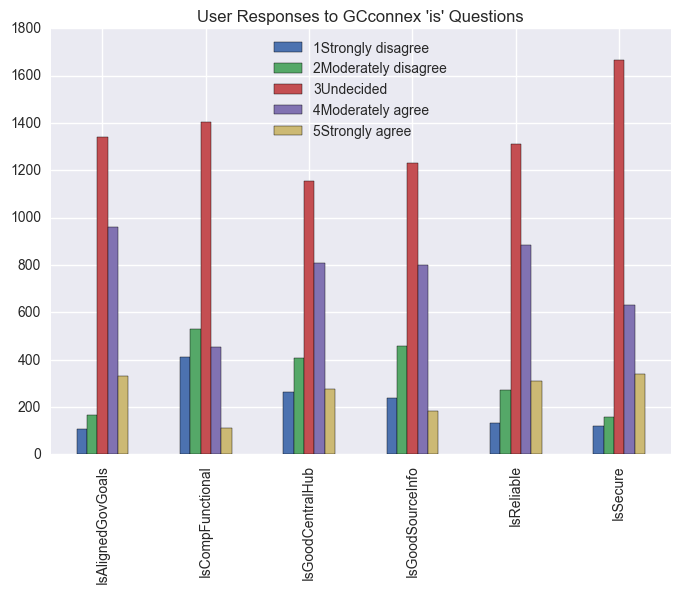

In [35]:
#Quick plot of the table
istable.plot(kind = "bar", title = "User Responses to GCconnex 'is' Questions")
plt.show()

#Also sidenote, you can plot dataframes directly from pandas, and this makes me unreasonably happy

### "Is" Table

The "is" table shows us what our sample group thinks about GCconnex as a tool. What we want to see is tall purple and yellow bars (the "Moderately Agree" and "Strongly Agree" responses). In each of the questions, users are still largely undecided as an aggregate. Most of the questions have more responses on the right side of 'undecided' rather than the left, indicating a slightly positive outlook on each of the questions (except for "Is Completely Functional").

### "Help" Table

Continuing our analysis with other factors from the survey.


In [36]:

dfhelp = dfconnex.filter(regex = "Help")
dfhelp

helpdict = {}

for col in dfhelp:
    helpdict[col] = dfhelp[col].value_counts()

helpcounts = pd.DataFrame.from_dict(helpdict, orient = "index")

In [37]:
helpcollist = [c.replace("<br />", "") for c in list(helpcounts.columns)]
helpcounts.columns = helpcollist

In [38]:
helpcounts = helpcounts.reindex_axis(sorted(helpcounts.columns), axis = 1)

In [39]:
helpcounts

,1Strongly disagree,2Moderately disagree,3Undecided,4Moderately agree,5Strongly agree
HelpAgile,219,421,1165,826,286
HelpCollab,147,233,683,1186,669
Helpopen,136,202,1035,999,548


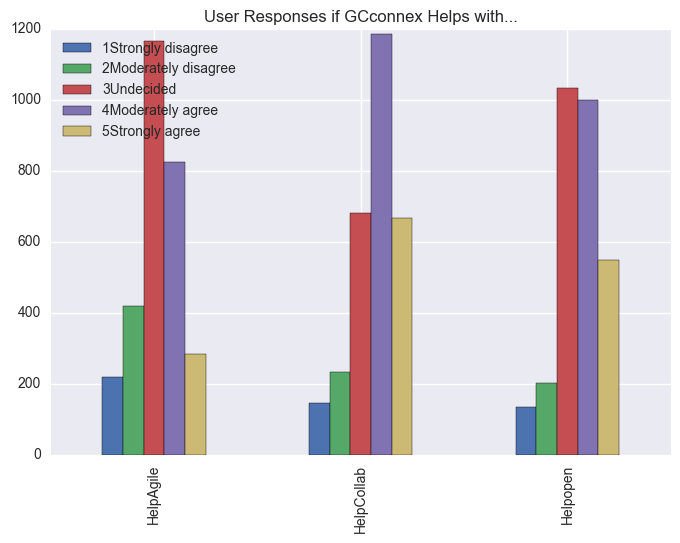

In [40]:
ax2 = helpcounts.plot.bar(title = "User Responses if GCconnex Helps with...")
#Relatively High marks for collaboration!
plt.show()

In [41]:
dfuseinfo = dfconnex[dfconnex['WhyUseFindReUseInfo'] == 1]
# Small tangent after speaking with Wahida. How many people who claim they use GCconnex to find information find search easy

In [42]:
dfuseinfo['EasyUseSearch'].value_counts() 

Yes                                  664
Don't know / Not sure / Don't use    487
No                                   393
Name: EasyUseSearch, dtype: int64

### Use of GCconnex vs. Ease of features
The above little digression makes me wonder if it would be easy to generate a series of crossplots (or even a crosstab) showing how people use GCconnex, and whether they find something easy or not. Variation in the ease of an operation that comes from the reason an individual uses GCconnex gives evidence of a learning curve, as well as whether the difficulty in using a feature stems from inexperience, or if it is just not simple to use.

In [43]:
#First Step is to pull the "Why Use," aspect, which has lots of other stuff in it

whyuse = dfconnex.filter(regex = "WhyUse")
whyuse.drop('WhyUseReason', inplace = True, axis = 1)

In [44]:
whyuse['Participant'] = dfconnex['Participant']


In [45]:
dfdev['Participant'] = dfconnex['Participant']

EaseVsWhy = pd.merge(whyuse, dfdev, on = "Participant")

#This has 34 columns, this might not work. I'll need to find a way to figure out how to do what I want to do

In [46]:
EaseVsWhy = EaseVsWhy.fillna(0)

In [47]:
 #I'm not sure if this will take me in the direction I want to go to be completely honest. 
# There's gotta be another less tedious way.

# What if I made the index all of the easy, and dropped everything that wasn't yes?
# Then it would be measuring the number of people who found it easy, and what they did. 
# I am so great.

In [48]:
EaseVsWhy.columns

Index(['WhyUseConnect', 'WhyUsePlan', 'WhyUseCoCreate', 'WhyUseFeedback',
       'WhyUseOrgShareInfo', 'WhyUseFindReUseInfo', 'WhyUseOfficialContent',
       'WhyUseFindNewPos', 'WhyUseCareerDev', 'WhyUseChat', 'WhyUseOther',
       'Participant', 'EasyUse', 'EasyInfo', 'EasyProfile', 'EasyNewsFeed',
       'EasyOnBoarding', 'EasyNotifications', 'EasyInformationGroup',
       'EasyCollabGroup', 'EasyWriteBlog', 'EasyReadBlog', 'EasyWriteWire',
       'EasyReadWire', 'EasyPostImage', 'EasyViewImage', 'EasyCreateBM',
       'EasyCreatePolls', 'EasyWidgets', 'EasyNoteIdeas', 'EasyUseChat',
       'EasyUseChatrooms', 'EasyUseSearch'],
      dtype='object')

In [49]:
EaseVsWhy.replace("Yes", 1, inplace = True)
EaseVsWhy.replace("No", 0, inplace = True)
EaseVsWhy.replace("Don't know / Not sure / Don't use", 0, inplace = True)
EaseVsWhy.replace("Don't know / Not sure", 0, inplace = True)

In [50]:
EaseVsWhy = EaseVsWhy.astype(int)

In [51]:
whycols = []
for col in EaseVsWhy.columns:
    if "Why" in col:
        whycols.append(col)

        


### Rubber Ducky

I'm not really getting anywhere with what I want to do, so I'm gonna use a textual rubber ducky method here. 

The EaseVsWhy dataframe consists of columns asking why people use GCconnex, and columns asking whether they find a certain aspect EASY. If the individual answered yes to a question in each column, they get coded with a 1. Otherwise it is coded 0. My ideal dataframe would have the Why questions as the index, and each of the Ease questions in the columns. In the spaces where the columns are, I want the number of indiduals who found each task easy numbered by the reasons why they use GCconnex

In [52]:
whylist = []
for col in whycols:
    whylist.append(EaseVsWhy[EaseVsWhy[col] == 1])
    

In [53]:
#Each element 

In [54]:
whylistsums = []

for why in whylist:
    whylistsums.append(why.sum())

In [55]:
useandease = pd.DataFrame(whylistsums).filter(regex  = "Easy")

In [56]:
useandease['WhyUse:'] = whycols

In [57]:
useandease = useandease.set_index('WhyUse:', drop = True )

### ...What?

If you're wondering what I just did above, so am I.

The dataframe shows everyone who answered "yes" to the question in the index, why they use GCconnex. It then goes column by column, tallying up everyone who responded "yes" to the question whether they found a certain task easy in GCconnex.

Lastly, because people could repsond that they use GCconnex for multiple things, one individual can be counted in several rows, but that's okay.

It's still lacking one thing, we don't have a proportional answer. We should normalize each row by the amount of people who responded yes to each row.

In [58]:
useandease

,EasyUse,EasyInfo,EasyProfile,EasyNewsFeed,EasyOnBoarding,EasyNotifications,EasyInformationGroup,EasyCollabGroup,EasyWriteBlog,EasyReadBlog,...,EasyReadWire,EasyPostImage,EasyViewImage,EasyCreateBM,EasyCreatePolls,EasyWidgets,EasyNoteIdeas,EasyUseChat,EasyUseChatrooms,EasyUseSearch
WhyUse:,,,,,,,,,,,,,,,,,,,,,
WhyUseConnect,593,457,773,664,328,663,475,512,182,529,...,400,239,459,258,116,136,135,304,233,447
WhyUsePlan,115,90,149,122,71,135,95,113,48,103,...,71,54,85,58,39,43,37,58,46,85
WhyUseCoCreate,190,145,255,215,131,219,154,200,81,177,...,130,86,150,108,54,57,60,104,88,134
WhyUseFeedback,257,189,344,278,151,328,223,290,93,237,...,159,97,208,140,59,69,70,128,97,187
WhyUseOrgShareInfo,434,337,593,501,251,543,378,459,177,395,...,306,192,350,222,108,122,112,210,160,324
WhyUseFindReUseInfo,828,614,1212,985,466,1106,751,767,215,787,...,546,284,665,393,131,162,169,330,281,664
WhyUseOfficialContent,402,307,611,483,242,527,342,357,97,382,...,263,125,326,207,53,71,80,136,136,334
WhyUseFindNewPos,329,264,444,371,194,391,269,254,92,290,...,239,95,219,137,46,62,68,139,125,253
WhyUseCareerDev,376,290,510,441,232,439,305,327,119,367,...,281,136,296,177,75,81,86,173,143,282


In [59]:
EaseVsWhy.sum()

WhyUseConnect                 946
WhyUsePlan                    177
WhyUseCoCreate                312
WhyUseFeedback                436
WhyUseOrgShareInfo            716
WhyUseFindReUseInfo          1566
WhyUseOfficialContent         802
WhyUseFindNewPos              567
WhyUseCareerDev               622
WhyUseChat                    403
WhyUseOther                   456
Participant              11812230
EasyUse                      1438
EasyInfo                     1064
EasyProfile                  2186
EasyNewsFeed                 1693
EasyOnBoarding                810
EasyNotifications            1897
EasyInformationGroup         1213
EasyCollabGroup              1223
EasyWriteBlog                 332
EasyReadBlog                 1257
EasyWriteWire                 422
EasyReadWire                  845
EasyPostImage                 455
EasyViewImage                1041
EasyCreateBM                  564
EasyCreatePolls               192
EasyWidgets                   233
EasyNoteIdeas 

In [60]:
whylistthings = EaseVsWhy.sum()[:11]

In [61]:
useandease['norm'] = whylistthings

In [62]:
useandease

,EasyUse,EasyInfo,EasyProfile,EasyNewsFeed,EasyOnBoarding,EasyNotifications,EasyInformationGroup,EasyCollabGroup,EasyWriteBlog,EasyReadBlog,...,EasyPostImage,EasyViewImage,EasyCreateBM,EasyCreatePolls,EasyWidgets,EasyNoteIdeas,EasyUseChat,EasyUseChatrooms,EasyUseSearch,norm
WhyUse:,,,,,,,,,,,,,,,,,,,,,
WhyUseConnect,593,457,773,664,328,663,475,512,182,529,...,239,459,258,116,136,135,304,233,447,946
WhyUsePlan,115,90,149,122,71,135,95,113,48,103,...,54,85,58,39,43,37,58,46,85,177
WhyUseCoCreate,190,145,255,215,131,219,154,200,81,177,...,86,150,108,54,57,60,104,88,134,312
WhyUseFeedback,257,189,344,278,151,328,223,290,93,237,...,97,208,140,59,69,70,128,97,187,436
WhyUseOrgShareInfo,434,337,593,501,251,543,378,459,177,395,...,192,350,222,108,122,112,210,160,324,716
WhyUseFindReUseInfo,828,614,1212,985,466,1106,751,767,215,787,...,284,665,393,131,162,169,330,281,664,1566
WhyUseOfficialContent,402,307,611,483,242,527,342,357,97,382,...,125,326,207,53,71,80,136,136,334,802
WhyUseFindNewPos,329,264,444,371,194,391,269,254,92,290,...,95,219,137,46,62,68,139,125,253,567
WhyUseCareerDev,376,290,510,441,232,439,305,327,119,367,...,136,296,177,75,81,86,173,143,282,622


In [63]:
useeasenormed = useandease.apply(lambda x: x/useandease['norm']*100)

In [64]:
useeasenormed.drop('norm', inplace = True, axis = 1)

In [65]:
useeasenormed.to_csv(data_path+'Ease of Tasks Depending on Use.csv') 
#This table gives the proportion of users who find each task easy depending on what they use GCconnex for

In [66]:
useeasenormed.describe().to_csv(data_path+"Ease of Tasks Depending on Use Summary Statistics.csv")

#### Use of tools and ease of tasks
The tables above show how users' perceived ease of tasks of GCconnex depend on how they use GCconnex. For example, a significant amount of users who use GCconnex for chat found chat easy to use, however when they used GCconnex for other reasons, the reported ease of chat fell.

Again, if a user uses GCconnex for both chat and career development, and they say chat is easy, that will count as a "yes" in both the chat and the career development rows. Nothing much can be done about that.

Checking out the variation in responses in the columns is interesting. The ease of some tasks depends on the use, and for other responses, there isnt much variation depending on the use of tasks.



# Demographic Data Cleaning

I'm gonna look at demographic information to make sure it's cleaned up. This way, I can start playing with models soon. I don't want to do any models without having the controls of age, gender, time on public service etc. This will make (some) models more robust and help lend credence to the claims we will be making.

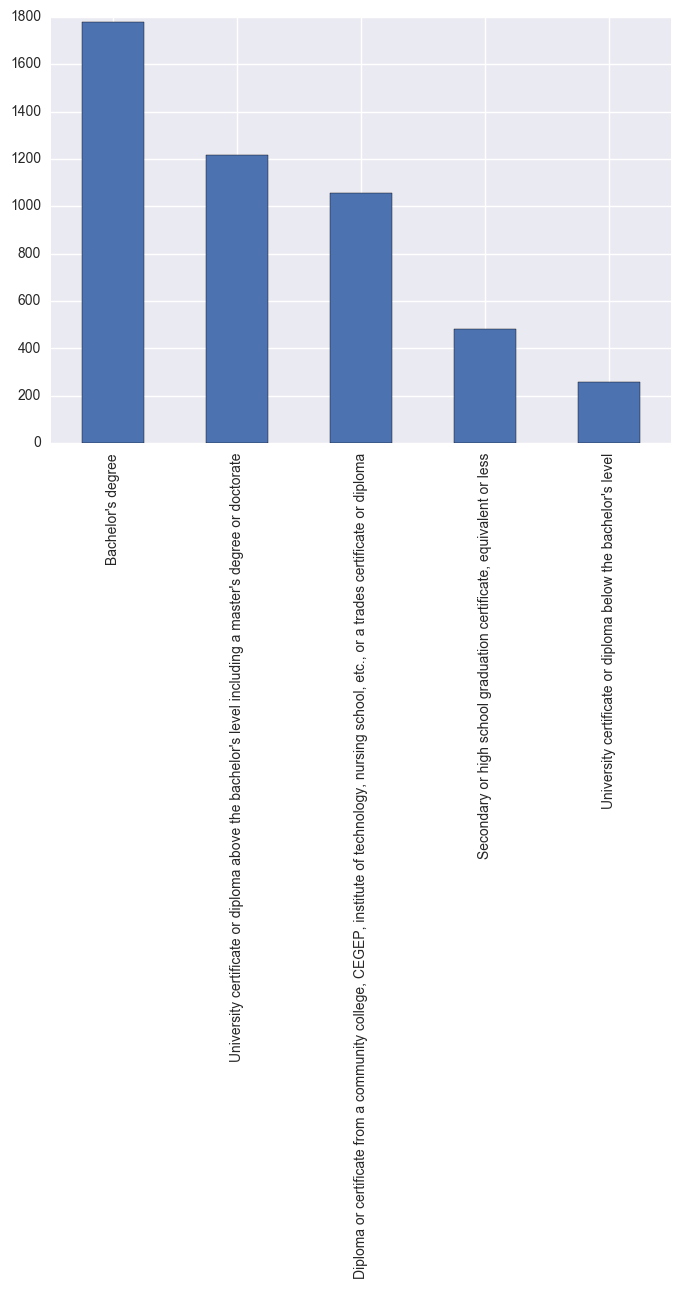

In [67]:
df3['Education'].value_counts().plot.bar()
plt.show()

In [68]:
dataframe = pd.merge(df3, dfconnex, on = 'Participant') # I kind of forgot that I already did everything necessary for that.



Here is where I start having to be careful with what I'm doing as I progress further. I have 85 columns for the GCconnex study, which is all well and good, however I have to bear in mind that almost every single column is missing an observation. I have to go through the dataframe and figure out exactly how to go about cleaning the data.

Some answers that lack responses should be filled with N/A instead. Other answers should be dropped if there is N/A. 

In [69]:
dataframe.to_csv(data_path+'Clean_File.csv')

I am going to perform the data cleaning with respect to a certain model in a different notebook. I don't want to put in too many things into one notebook. This was good for exploring what there is in the original file, and cleaning it up so that it is comprehensible for myself. I will likely return to this notebook when I want to look at the other GCTools (GCPedia, GCIntranet). A lot of the work for the other GCTools will build off what is already in this notebook.